# Cosmic Watch Data Analysis 

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch. 

In [ ]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

inline_rc = dict(mpl.rcParams)

data = pd.read_csv('https://github.com/dkallenberg/Quarknet-CosmicWatch-ipynb/raw/master/CW_Sample.csv')

data.head(5)

In [ ]:
data.shape

(6753, 6)

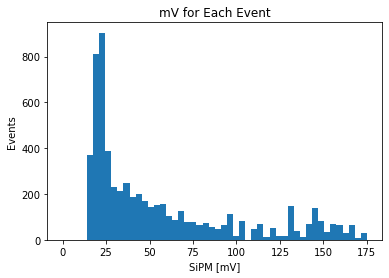

In [ ]:
# This makes a histogram of that totally useless calculation above
plt.hist(data.SiPM, bins=50, range=[0,175], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");

In [ ]:
data['UpTime'] = (data.RunTime - data.DownTime)
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
data['Minute']= (data.UpTime/(60000))%60
data.head(100)

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute
0,1,406,185,31.51,727,24.44,-321,-1 days +23:59:59.679000,59.994650
1,2,617,371,73.82,731,24.44,-114,-1 days +23:59:59.886000,59.998100
2,3,684,575,187.30,735,24.44,-51,-1 days +23:59:59.949000,59.999150
3,4,912,339,62.98,739,24.44,173,0 days 00:00:00.173000,0.002883
4,5,1252,560,175.34,926,24.44,326,0 days 00:00:00.326000,0.005433
...,...,...,...,...,...,...,...,...,...
95,96,39678,99,21.91,8314,24.44,31364,0 days 00:00:31.364000,0.522733
96,97,39968,432,101.61,8318,24.44,31650,0 days 00:00:31.650000,0.527500
97,98,40740,255,43.96,8507,24.44,32233,0 days 00:00:32.233000,0.537217
98,99,41872,476,129.76,8694,24.44,33178,0 days 00:00:33.178000,0.552967


In [ ]:
data['avgRate'] = data.Event/(data.UpTime/1000)
data.head(5)

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,406,185,31.51,727,24.44,-321,-1 days +23:59:59.679000,59.994650,-3.115265
1,2,617,371,73.82,731,24.44,-114,-1 days +23:59:59.886000,59.998100,-17.543860
2,3,684,575,187.30,735,24.44,-51,-1 days +23:59:59.949000,59.999150,-58.823529
3,4,912,339,62.98,739,24.44,173,0 days 00:00:00.173000,0.002883,23.121387
4,5,1252,560,175.34,926,24.44,326,0 days 00:00:00.326000,0.005433,15.337423


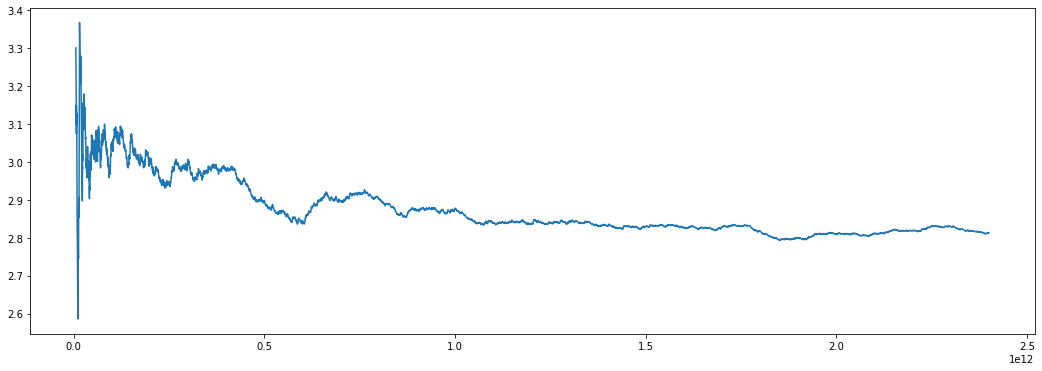

In [ ]:
data['greater0'] = data.avgRate > 0
data['less5'] = data.avgRate < 3.5
data['0to5']= data.greater0 & data.less5
data2 = data[(data ['0to5'] == True)]
#data2.head(20)

plt.figure(figsize=(18,6))
plt.plot(data2['Time'],data2['avgRate'])
plt.show()
#data2.plot.line(x='Time',y='avgRate')
